<h1> Analise dos dados de Banda Larga Fixa <h1>

<h3> Neste arquivo, será possível visualizar através de gráficos algumas informações interessantes sobre os dados de Banda Larga Fixa da ANATEL</h3>

Obs: Para visualizar os dados da base de dados chamada "Total" é necessário o download deste projeto junto de suas bases de dados, estes dados estão disponíveis no site da Anatel, mais especificamente no link abaixo:

https://cloud.anatel.gov.br/index.php/s/TpaFAwSw7RPfBa8?path=%2FComunicacao_Multimidia

Basta baixar os dados e copiar a pasta "Total" para a pasta de "Comunicação e Multimidia " do projeto e descomentar a linha de abertura do arquivo e rodar o kernel novamente.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




porGrupo= pd.read_csv('Comunicacao_Multimidia/Por_Grupo/csv/Acessos_SCM_2015-2018_-_Grupo.csv', sep=';', encoding='latin-1')

porEstado= pd.read_csv('Comunicacao_Multimidia/Por_UF/csv/Acessos_SCM_2015-2018_-_UF.csv', sep=';', encoding='latin-1')

porRegiao = pd.read_csv('Comunicacao_Multimidia/Por_Regiao/csv/Acessos_SCM_2015-2018_-_Regiao.csv', sep=';',encoding='latin-1')

porMunicipio= pd.read_csv('Comunicacao_Multimidia/Por_Municipio/csv/Acessos_SCM_2015-2018_-_Municipio.csv',sep=';',encoding='latin-1')

porEmpresa = pd.read_csv('Comunicacao_Multimidia/Por_Empresa/csv/Acessos_SCM_2015-2018_-_Empresa.csv',sep=';',encoding='latin-1')

porVelocidade =pd.read_csv('Comunicacao_Multimidia/Por_Faixa_De_Velocidade/csv/Acessos_SCM_2015-2018_-_Faixa_De_Velocidade.csv', sep=';' , encoding ='latin-1')

porTecnologia =pd.read_csv('Comunicacao_Multimidia/Por_Tecnologia/csv/Acessos_SCM_2015-2018_-_Tecnologia.csv', sep=';' , encoding ='latin-1')

#Descomente a linha abaixo para utilizar a base de dados Total;
#total= pd.read_csv('Comunicacao_Multimidia/Total/csv/Acessos_SCM_2015-2018_-_Total.csv',sep=';',encoding='latin-1')

In [2]:
porRegiao.dropna()
porEstado.dropna()

print('')
sp = porEstado.query('UF == "SP"')
sp.head()

,UF,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
25,SP,8914991,8962694,9037004,9071061,9115903,9130998,9173649,9221519,9237265,...,9910748,9927032,9929335,10060357,10116023,10200108,10245153,10279016,10335579,10360034


c:\users\wander washington\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
c:\users\wander washington\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


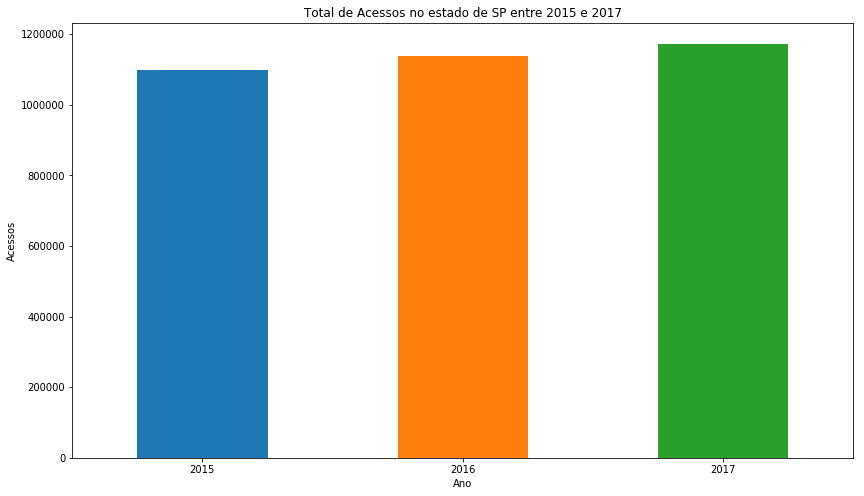

In [3]:
# ANOTHER WAY
#soma2015= sp['2015-01']+sp['2015-02']+sp['2015-03']+sp['2015-04']+sp['2015-05']+sp['2015-06']+sp['2015-07']+sp['2015-08']+sp['2015-09']+sp['2015-10']+sp['2015-11']+sp['2015-12']
#soma2016= sp['2016-01']+sp['2016-02']+sp['2016-03']+sp['2016-04']+sp['2016-05']+sp['2016-06']+sp['2016-07']+sp['2016-08']+sp['2016-09']+sp['2016-10']+sp['2016-11']+sp['2016-12']
#soma2017= sp['2017-01']+sp['2017-02']+sp['2017-03']+sp['2017-04']+sp['2017-05']+sp['2017-06']+sp['2017-07']+sp['2017-08']+sp['2017-09']+sp['2017-10']+sp['2017-11']+sp['2017-12']
#soma2017= sp['2017-01']+sp['2017-02']+sp['2017-03']+sp['2017-04']+sp['2017-05']+sp['2017-06']+sp['2017-07']+sp['2017-08']+sp['2017-09']+sp['2017-10']+sp['2017-11']+sp['2017-12']

soma2015= sp.iloc[:,0:13].sum(axis=1)
soma2015.index = ['2015']

soma2016=sp.iloc[:,13:25].sum(axis=1)
soma2016.index=['2016']

soma2017=sp.iloc[:,25:37].sum(axis=1)
soma2017.index=['2017']

soma2015= soma2015[0]
soma2016= soma2016[0]
soma2017= soma2017[0]


soma2015 = soma2015/100
soma2016= soma2016/100
soma2017= soma2017/100

lista_totais=[]
lista_totais.append(soma2015)
lista_totais.append(soma2016)
lista_totais.append(soma2017)

lista_anos=[]
lista_anos.append('2015')
lista_anos.append('2016')
lista_anos.append('2017')

TotalSP= pd.DataFrame()
TotalSP['Total']=''
TotalSP['Ano']=''


for valor in range(0,len(lista_totais)):#Lendo os valores guardados em uma lista
    TotalSP.set_value(valor, 'Total', lista_totais[valor])#Gravando os valores do nosso dataframe

for valor in range(0,len(lista_anos)):#Lendo os valores guardados em uma lista
    TotalSP.set_value(valor, 'Ano', lista_anos[valor])#Gravando os valores do nosso dataframe


#junc = pd.concat([sp,dataframe],axis=1)
#junc

#TotalSP['total2015'] = soma2015
TotalSP.set_index("Ano",drop=True,inplace=True)


TotalSP['Total'].sort_values().plot(kind='bar',figsize=(14,8), grid=False, rot=0)

plt.title("Total de Acessos no estado de SP entre 2015 e 2017")
plt.xlabel("Ano")
plt.ylabel("Acessos")
plt.show()



In [31]:
#soma2015TESTE= sp['2015-01']+sp['2015-02']+sp['2015-03']+sp['2015-04']+sp['2015-05']
#soma2016TESTE= sp['2016-01']+sp['2016-02']+sp['2016-03']+sp['2016-04']+sp['2016-05']
#soma2017TESTE= sp['2017-01']+sp['2017-02']+sp['2017-03']+sp['2017-04']+sp['2017-05']
#soma2018TESTE= sp['2018-01']+sp['2018-02']+sp['2018-03']+sp['2018-04']+sp['2018-05']


soma2015= sp.iloc[:,1:6].sum(axis=1)
soma2016=sp.iloc[:,13:18].sum(axis=1)
soma2017=sp.iloc[:,25:30].sum(axis=1)
soma2018=sp.iloc[:,37:42].sum(axis=1)

auxiliar2015= soma2015.values
auxiliar2015= auxiliar2015[0]

auxiliar2016=soma2016.values
auxiliar2016=auxiliar2016[0]

auxiliar2017= soma2017.values
auxiliar2017= auxiliar2017[0]

auxiliar2018= soma2018.values
auxiliar2018= auxiliar2018[0]


soma2015 = auxiliar2015/100
soma2016= auxiliar2016/100
soma2017= auxiliar2017/100
soma2018= auxiliar2018/100



lista_totais_2018=[]
lista_totais_2018.append(soma2015)
lista_totais_2018.append(soma2016)
lista_totais_2018.append(soma2017)
lista_totais_2018.append(soma2018)

lista_anos_2018=[]
lista_anos_2018.append('2015')
lista_anos_2018.append('2016')
lista_anos_2018.append('2017')
lista_anos_2018.append('2018')

TotalSP_2018= pd.DataFrame()
TotalSP_2018['Ano']=''
TotalSP_2018['Total_Ate_Maio']=''

for valor in range(0,len(lista_totais_2018)):#Lendo os valores guardados em uma lista
    TotalSP_2018.set_value(valor, 'Total_Ate_Maio', lista_totais_2018[valor])#Gravando os valores do nosso dataframe

for valor in range(0,len(lista_anos_2018)):#Lendo os valores guardados em uma lista
    TotalSP_2018.set_value(valor, 'Ano', lista_anos_2018[valor])#Gravando os valores do nosso dataframe


TotalSP_2018.set_index("Ano",drop=True,inplace=True)


TotalSP_2018

c:\users\wander washington\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
c:\users\wander washington\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:52: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,Total_Ate_Maio
Ano,
2015,451017
2016,469124
2017,482269
2018,509007


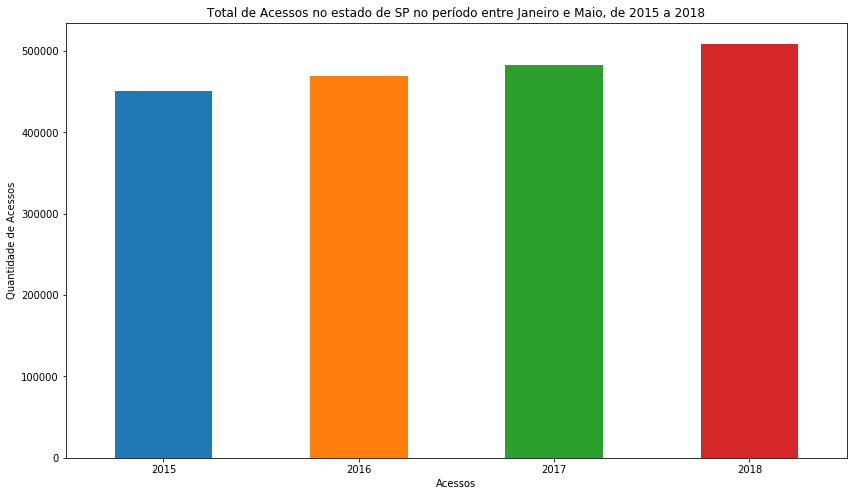

In [33]:
TotalSP_2018['Total_Ate_Maio'].sort_values().plot(kind='bar',figsize=(14,8), grid=False, rot=0)


plt.title("Total de Acessos no estado de SP no período entre Janeiro e Maio, de 2015 a 2018")
plt.xlabel("Acessos")
plt.ylabel("Quantidade de Acessos")
plt.show()

In [34]:
porGrupo.head(10)

,Grupo,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,ALGAR (CTBC TELECOM),416910,419315,423407,427623,431662,435735,440412,444034,445972,...,533731,538468,542872,546604,550214,554428,557588,559087,562847,564659
1,BLUE,17305,120275,121008,120760,123203,121694,123099,124591,122605,...,0,0,0,0,0,0,0,0,0,0
2,BT,40476,33795,33533,33029,33354,32559,33337,32584,33251,...,23403,22804,22444,22807,20680,21072,22941,22474,22650,22735
3,CABO,79392,77330,82658,81688,81006,81295,82472,83545,84300,...,110043,110230,110462,111431,111662,112100,112230,112506,112294,112024
4,DATORA,250,250,0,0,0,0,0,0,0,...,0,0,29,25,21,30,21,19,20,25
5,GVT,2979059,3008562,3049965,3087285,3127021,3160580,3198026,3234547,3256257,...,0,0,0,0,0,0,0,0,0,0
6,NEXTEL,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,OI,6543473,6525510,6488478,6459504,6466954,6446214,6449048,6436810,6425803,...,6346608,6327202,6304014,6282053,6253295,6226017,6211703,6203033,6193713,6180894
8,Outras,1983845,2032540,2060800,2110417,2162854,2178667,2201861,2247383,2355322,...,4063610,4163831,4431479,4845563,4919010,5126225,5294929,5405161,5556652,5637922
9,PREFEITURA DE LONDRINA/COPEL,142499,146044,147803,149496,151964,153025,154876,153464,154839,...,201381,213569,225444,235121,246250,261041,275484,288412,291150,295586


In [35]:
porRegiao.dropna()

,Região,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07
0,Centro-oeste,1927778,1954269,1971965,1993253,2011274,2027749,2041189,2044322,2065924,...,2390999,2410840,2437438,2465484,2475828,2497605,2505931,2515078,2542687,2545401
1,Nordeste,2906800,2928410,2941379,2951744,2970069,2978688,3002105,3015775,3040414,...,3485781,3510028,3592683,3659214,3672557,3709319,3760831,3790509,3824653,3837478
2,Norte,747065,777897,790924,800212,811603,822422,813285,843752,848753,...,1042711,1057860,1067391,1083585,1098282,1111953,1117878,1132475,1125734,1138022
3,Sudeste,14365503,14449730,14529031,14613261,14719420,14738827,14833630,14905974,14975842,...,16394132,16431581,16548667,16767430,16824026,17023033,17137029,17197385,17276566,17344960
4,Sul,4210015,4293176,4317274,4340510,4370813,4395540,4422030,4450628,4525760,...,5150282,5209864,5246444,5396059,5429211,5476632,5538002,5588519,5657968,5679405


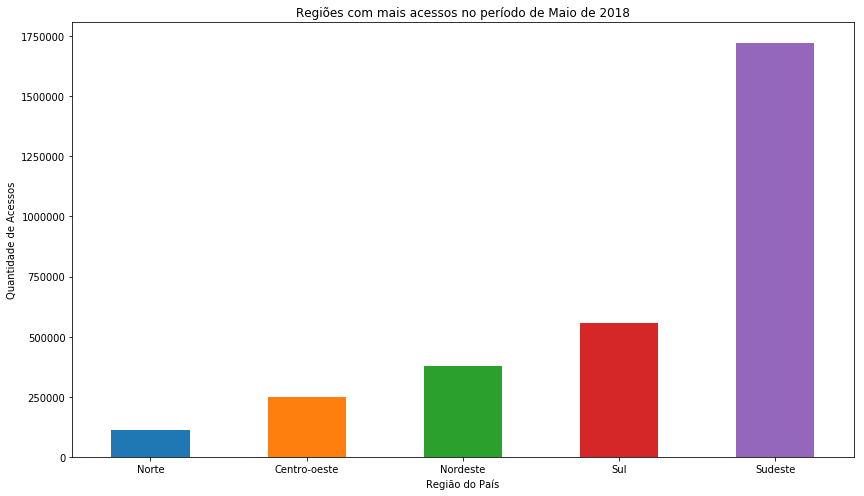

In [36]:
#porRegiaoBR.groupby('Região')['2018-05'].sum().head(20).plot(kind='bar')
auxiliarRegiao=porRegiao.groupby('Região')['2018-05'].sum()/10

auxiliarRegiao.head(2)
auxiliarRegiao.sort_values().plot(kind='bar',figsize=(14,8), grid=False, rot=0)
plt.title("Regiões com mais acessos no período de Maio de 2018")
plt.xlabel("Região do País")
plt.ylabel("Quantidade de Acessos")
plt.savefig('Graficos_BandaLargaFixa/Grafico_Regioes_acessos_Maio_2018.png')

In [ ]:
porMunicipio.dropna()

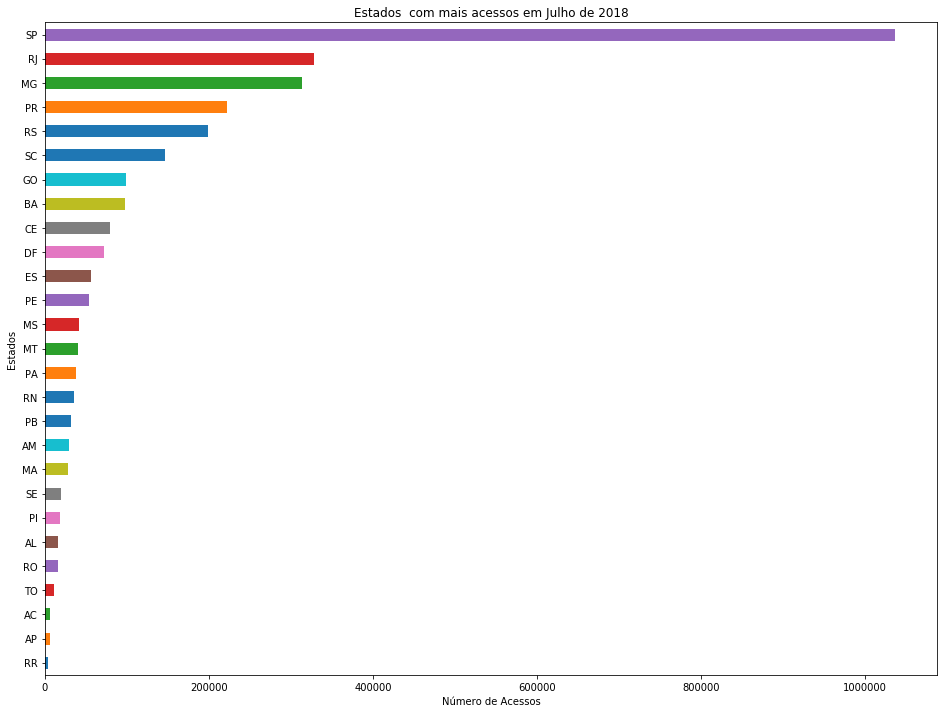

In [37]:
porMunicipio = porMunicipio.dropna()
auxiliar=porMunicipio.groupby('UF')['2018-07'].sum()/10

auxiliar.head(2)

auxiliar.sort_values().plot(kind='barh',figsize=(16,12), grid=False, rot=0)
plt.title("Estados  com mais acessos em Julho de 2018")
plt.xlabel("Número de Acessos")
plt.ylabel("Estados")

plt.savefig('Graficos_BandaLargaFixa/Grafico de Acessos Julho 2018.png')
#Concertar linha Y,X pois os valores estão muito altos para o gráfico.


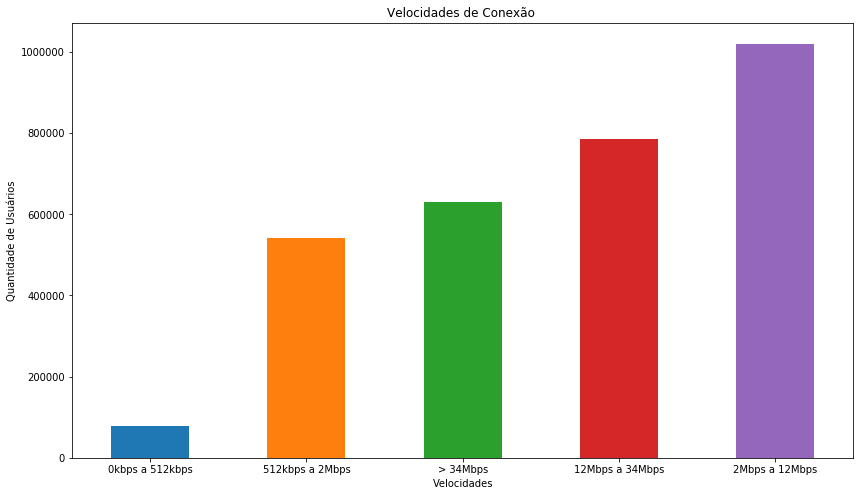

In [38]:
porVelocidade.dropna()

#porRegiaoBR.groupby('Região')['2018-05'].sum().head(20).plot(kind='bar')
auxiliarVelocidade=porVelocidade.groupby('Faixa')['2018-07'].sum()/10

auxiliarVelocidade.head(2)
auxiliarVelocidade.sort_values().plot(kind='bar',figsize=(14,8), grid=False, rot=0)
plt.title("Velocidades de Conexão ")
plt.xlabel("Velocidades")
plt.ylabel("Quantidade de Usuários")
plt.savefig('Graficos_BandaLargaFixa/Grafico_Velocidades_de_Internet.png')

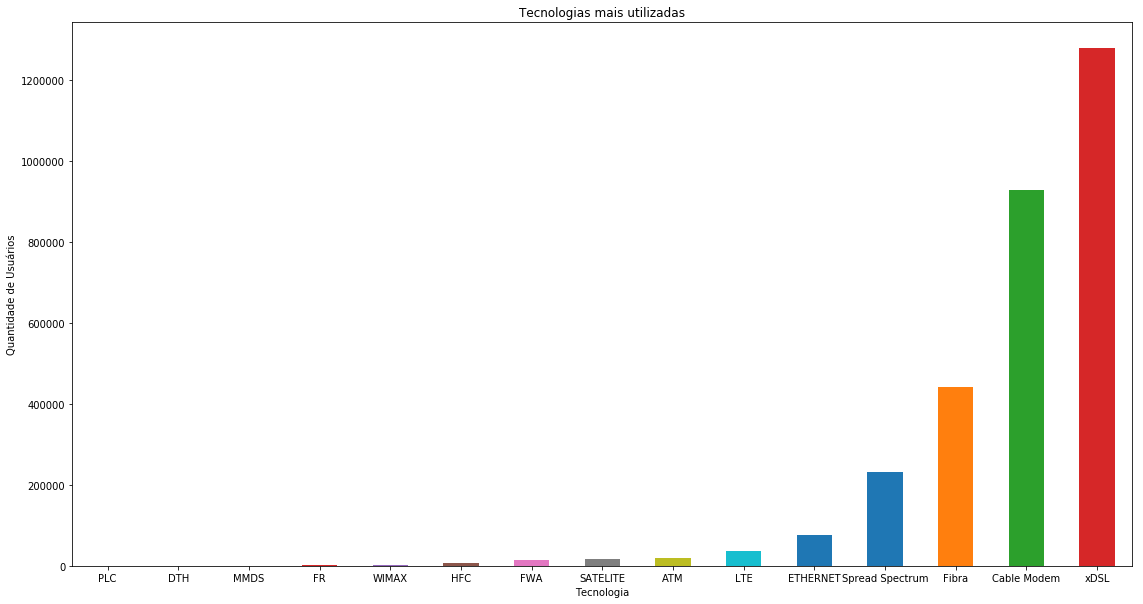

In [39]:
porTecnologia.dropna()

#porRegiaoBR.groupby('Região')['2018-05'].sum().head(20).plot(kind='bar')
auxiliarTecnologia=porTecnologia.groupby('Tecnologia')['2018-07'].sum()/10

auxiliarTecnologia.head(2)
auxiliarTecnologia.sort_values().plot(kind='bar',figsize=(19,10), grid=False, rot=0)
plt.title("Tecnologias mais utilizadas")
plt.xlabel("Tecnologia")
plt.ylabel("Quantidade de Usuários")
plt.savefig('Graficos_BandaLargaFixa/Grafico_Tecnologia_Mais_Utilizada.png')

In [40]:
#Descomente as linhas abaixo caso vá utilizar os dados da base de dados "Total"

#auxiliarTotal=total.groupby('Grupo')['2018-07'].sum()/10

#auxiliarTotal.head(2)
#auxiliarTotal.sort_values().plot(kind='bar',figsize=(30,10), grid=False, rot=0)
#plt.title("Empresas de Telecomunicações, gráfico de acessos")
#plt.xlabel("Empresas")
#plt.ylabel("Quantidade de Acessos")
#plt.savefig('Graficos_BandaLargaFixa/Grafico_Empresa_Mais_Utilizada_INTERNET.png')